In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/USDT-USD.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,1.001550,1.007147,0.993230,1.001900,1.001900,37771545362
1,2020-01-28,1.002014,1.008240,0.991067,1.000760,1.000760,44123906993
2,2020-01-29,1.001529,1.006268,0.993174,1.002296,1.002296,42323320108
3,2020-01-30,1.003219,1.010996,0.997548,1.001452,1.001452,43624728074
4,2020-01-31,1.002196,1.006945,0.997409,1.000648,1.000648,40496855325


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1050,2022-12-12,1.000085,1.000212,1.000024,1.000107,1.000107,25872687355
1051,2022-12-13,1.000111,1.000573,0.999972,1.000017,1.000017,37452330494
1052,2022-12-14,1.000028,1.000132,0.999964,1.000105,1.000105,31427740393
1053,2022-12-15,1.000109,1.000186,1.000039,1.000078,1.000078,24979746073
1054,2022-12-16,1.000077,1.000180,1.000023,1.000157,1.000157,31897990627


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1.055000e+03
mean,1.000543,1.003286,0.998203,1.000562,1.000562,6.504797e+10
std,0.002471,0.006646,0.005301,0.002672,0.002672,3.451132e+10
min,0.973284,0.997736,0.899490,0.974248,0.974248,1.543096e+10
25%,1.000001,1.000343,0.998267,1.000017,1.000017,4.293692e+10
50%,1.000292,1.000991,0.999764,1.000283,1.000283,5.676920e+10
75%,1.000800,1.002829,1.000055,1.000806,1.000806,7.768318e+10
max,1.039605,1.084802,1.001610,1.053585,1.053585,2.790675e+11


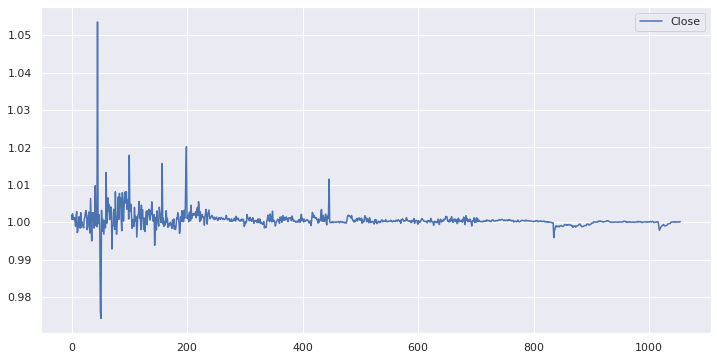

In [6]:
df[['Close']].plot(figsize=(12,6));


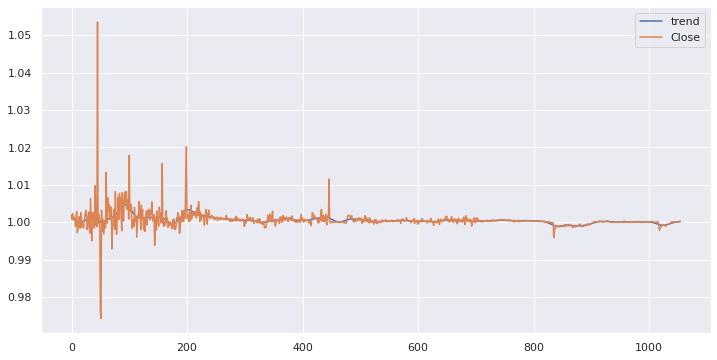

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-4.154920663854402,
 0.0007847404216834096,
 20,
 1034,
 {'1%': -3.4366900467481667,
  '5%': -2.8643392574735627,
  '10%': -2.568260441619371},
 -9480.049714507593)

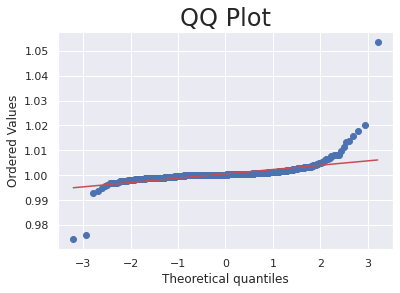

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


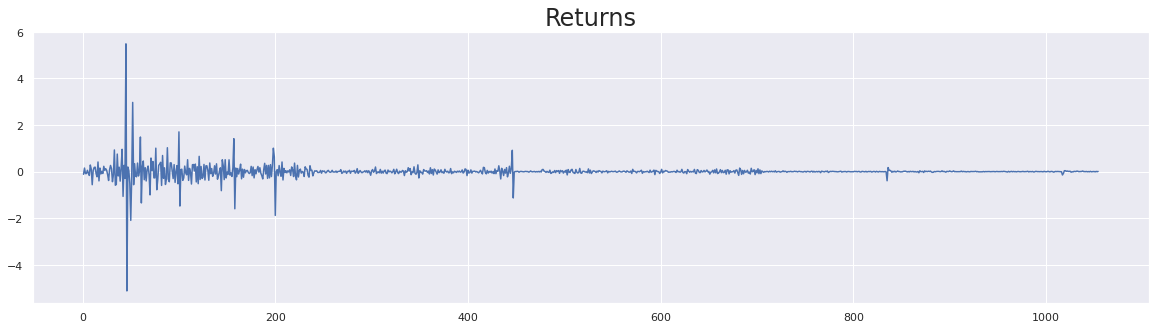

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


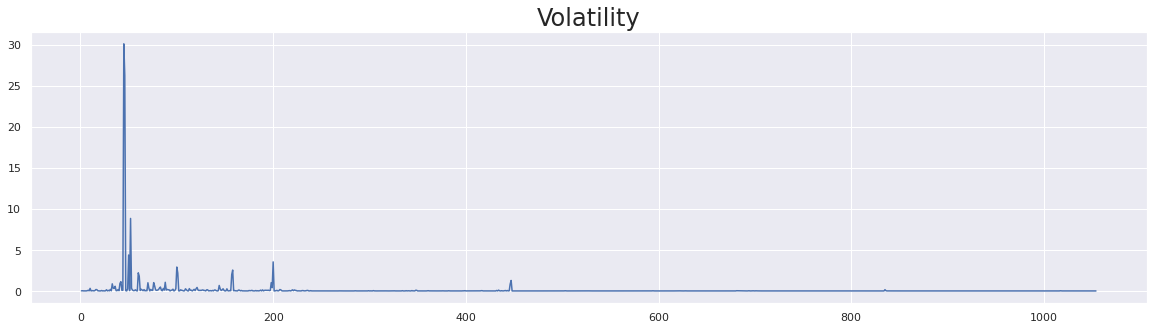

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

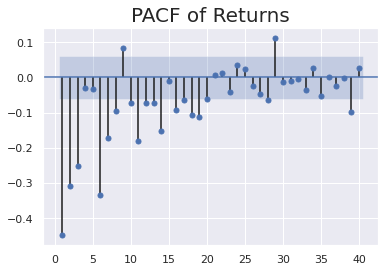

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

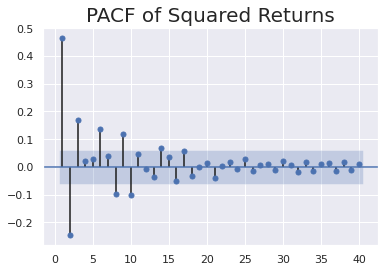

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 29.8 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 9288734.237839492
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4866.699924414175
Iteration:      3,   Func. Count:     24,   Neg. LLF: -400.0536299442695
Iteration:      4,   Func. Count:     28,   Neg. LLF: -405.5374318379131
Iteration:      5,   Func. Count:     32,   Neg. LLF: -406.5894849169472
Iteration:      6,   Func. Count:     36,   Neg. LLF: -406.7652994501896
Iteration:      7,   Func. Count:     40,   Neg. LLF: -406.99797672339014
Iteration:      8,   Func. Count:     44,   Neg. LLF: -407.0004251030805
Iteration:      9,   Func. Count:     48,   Neg. LLF: -407.00043881251224
Iteration:     10,   Func. Count:     51,   Neg. LLF: -407.0004343132885
Optimization terminated successfully    (Exit mode 0)
            Current function value: -407.00043881251224
            Iterations: 10
            Function evaluations: 51
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                407.000
Distribution:                  Normal   AIC:                          -808.001
Method:            Maximum Likelihood   BIC:                          -793.120
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:49   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0118  9.160e-03      1.290      0.197 [-6.133e-03,2.978e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      7.9886e-03  5.047e-03      1.583      0.113 [-1.903e-03,1.788e-02]
alpha[1]       1.0000      0.310      3.221  1.276e-03      [  0.392,  1.608]
=============================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 3789.1655934719433
Iteration:     10,   Func. Count:     85,   Neg. LLF: -786.8311026434262
Optimization terminated successfully    (Exit mode 0)
            Current function value: -786.8310980477443
            Iterations: 14
            Function evaluations: 85
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                786.831
Distribution:                  Normal   AIC:                          -1565.66
Method:            Maximum Likelihood   BIC:                          -1545.82
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:49   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.8621e-03  2.024e-03      0.920      0.358 [-2.105e-03,5.830e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.1964e-03  4.908e-03      0.448      0.655 [-7.423e-03,1.182e-02]
alpha[1]       0.3669      0.184      1.994  4.610e-02    [6.341e-03,  0.727]
alpha[2]       0.6240      0.235      2.660  7.807e-03      [  0.164,  1.084]
=============================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: -382.1668972087796
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2036.7189220130945
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -912.4471332626024
            Iterations: 17
            Function evaluations: 113
            Gradient evaluations: 13


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                912.447
Distribution:                  Normal   AIC:                          -1814.89
Method:            Maximum Likelihood   BIC:                          -1790.09
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:49   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.9050e-03  1.265e-03      1.506      0.132 [-5.746e-04,4.385e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.4302e-03  1.087e-03      3.155  1.607e-03 [1.299e-03,5.561e-03]
alpha[1]       0.4406      0.111      3.954  7.681e-05     [  0.222,  0.659]
alpha[2]       0.4636      0.149      3.122  1.797e-03     [  0.173,  0.755]
alpha[3]       0.1150  7.296e-02      1.577      0.115  [-2.796e-02,  0.258]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     88,   Neg. LLF: -324.4442923076929
Iteration:     10,   Func. Count:    188,   Neg. LLF: 66990.81428575997
Iteration:     15,   Func. Count:    283,   Neg. LLF: 18886.031884876138
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1093.724826250793
            Iterations: 22
            Function evaluations: 338
            Gradient evaluations: 18


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1093.72
Distribution:                  Normal   AIC:                          -2157.45
Method:            Maximum Likelihood   BIC:                          -2083.04
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:49   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.6841e-03  2.308e-03      3.762  1.683e-04 [4.160e-03,1.321e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.0086e-03  1.247e-03      1.611      0.107 [-4.345e-04,4.452e-03]
alpha[1]       0.3503      0.254      1.378      0.168      [ -0.148,  0.849]
alpha[2]       0.2250      0.162      1.387      0.165   [-9.291e-02,  0.543]
alpha[3]       0.0441      0.194      0.228      0.820      [ -0.335,  0.424]
alpha[4]       0.1021      0.405      0.252      0.801      [ -0.691,  0.895]
alpha[5]   2.3958e-03  6.611e-02  3.624e-02      0.971      [ -0.127,  0.132]
alpha[6]       0.0414      0.131      0.316      0.752      [ -0.215,  0.298]
alpha[7]   2.3978e-03  7.230e-02  3.316e-02      0.974      [ -0.139,  0.144]
alpha[8]       0.0640  6.344e-02      1.008      0.313   [-6.037e-02,  0.188]
alpha[9]       0.0918      1.110  8.269e-02      0.934      [ -2.083,  2.267]
alpha[10]  2.4042e-03  5.550e-02  4.332e-02      0.965      [ -0.106,  0.111]
alpha[11]  2.3944e-03  5.355e-02  4.471e-02      0.964      [ -0.103,  0.107]
alpha[12]      0.2692      0.582      0.463      0.644      [ -0.872,  1.410]
alpha[13]  2.3987e-03  7.057e-03      0.340      0.734 [-1.143e-02,1.623e-02]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -747.4887464759366
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                747.489
Distribution:                  Normal   AIC:                          -1486.98
Method:            Maximum Likelihood   BIC:                          -1467.14
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:49   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.8397e-04  1.055e-03      0.364      0.716 [-1.684e-03,2.451e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.2005e-03  1.035e-04     21.260 2.690e-100 [1.998e-03,2.403e-03]
alpha[1]       0.2000  4.611e-02      4.338  1.439e-05     [  0.110,  0.290]
beta[1]        0.7800  1.001e-02     77.950      0.000     [  0.760,  0.800]
============================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -734.700883961872
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                734.701
Distribution:                  Normal   AIC:                          -1459.40
Method:            Maximum Likelihood   BIC:                          -1434.60
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:49   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.0382e-03  1.157e-03     -0.898      0.369 [-3.305e-03,1.229e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.2003e-03  7.180e-04      3.064  2.182e-03 [7.929e-04,3.608e-03]
alpha[1]       0.2001  5.392e-02      3.711  2.067e-04   [9.441e-02,  0.306]
beta[1]        0.3900      4.685  8.324e-02      0.934     [ -8.792,  9.572]
beta[2]        0.3900      4.633  8.417e-02      0.933     [ -8.691,  9.471]
============================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -719.7295399957097
            Iterations: 5
            Function evaluations: 7
            Gradient evaluations: 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                719.730
Distribution:                  Normal   AIC:                          -1427.46
Method:            Maximum Likelihood   BIC:                          -1397.70
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:49   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.8397e-04  1.066e-03      0.360      0.719 [-1.704e-03,2.472e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.2005e-03  1.478e-04     14.889  3.913e-50 [1.911e-03,2.490e-03]
alpha[1]       0.2000  5.845e-02      3.421  6.229e-04   [8.543e-02,  0.315]
beta[1]        0.2600      0.266      0.976      0.329     [ -0.262,  0.782]
beta[2]        0.2600      0.290      0.896      0.370     [ -0.309,  0.829]
beta[3]        0.2600      0.136      1.911  5.600e-02  [-6.661e-03,  0.527]
============================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -741.5117603597055
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                741.512
Distribution:                  Normal   AIC:                          -1473.02
Method:            Maximum Likelihood   BIC:                          -1448.22
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:50   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.8397e-04  1.062e-03      0.362      0.718 [-1.697e-03,2.465e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.2005e-03  1.061e-04     20.732  1.768e-95 [1.992e-03,2.409e-03]
alpha[1]       0.1000  3.237e-02      3.089  2.007e-03   [3.655e-02,  0.163]
alpha[2]       0.1000  7.387e-02      1.354      0.176  [-4.479e-02,  0.245]
beta[1]        0.7800  1.197e-02     65.169      0.000     [  0.757,  0.803]
============================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -736.4123429577248
            Iterations: 5
            Function evaluations: 7
            Gradient evaluations: 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                736.412
Distribution:                  Normal   AIC:                          -1460.82
Method:            Maximum Likelihood   BIC:                          -1431.06
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:50   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.8397e-04  1.062e-03      0.362      0.718 [-1.697e-03,2.465e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.2005e-03  1.112e-04     19.789  3.680e-87 [1.983e-03,2.418e-03]
alpha[1]       0.0667  2.382e-02      2.799  5.132e-03   [1.998e-02,  0.113]
alpha[2]       0.0667  9.517e-02      0.701      0.484     [ -0.120,  0.253]
alpha[3]       0.0667      0.118      0.567      0.571     [ -0.164,  0.297]
beta[1]        0.7800  1.394e-02     55.936      0.000     [  0.753,  0.807]
============================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     52,   Neg. LLF: 9963.951308967731
Iteration:     10,   Func. Count:     87,   Neg. LLF: -1134.8390911555045
Iteration:     15,   Func. Count:    117,   Neg. LLF: -1135.015048341491
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1135.0151866304627
            Iterations: 19
            Function evaluations: 141
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                1135.02
Distribution:                  Normal   AIC:                          -2260.03
Method:            Maximum Likelihood   BIC:                          -2235.23
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:50   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.7239e-03  2.929e-03      3.320  9.002e-04 [3.983e-03,1.546e-02]
                              Volatility Model                             
===========================================================================
                  coef    std err          t      P>|t|    95.0% Conf. Int.
---------------------------------------------------------------------------
omega          -0.1011  8.986e-02     -1.125      0.261 [ -0.277,7.502e-02]
alpha[1]        0.6041      0.124      4.856  1.195e-06   [  0.360,  0.848]
gamma[1]   -7.1880e-03  6.868e-02     -0.105      0.917   [ -0.142,  0.127]
beta[1]         0.9602  1.677e-02     57.268      0.000   [  0.927,  0.993]
===========================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                845.275
Distribution:                  Normal   AIC:                          -1680.55
Method:            Maximum Likelihood   BIC:                          -1655.75
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:50   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.9305e-03  2.684e-03     -0.719      0.472 [-7.191e-03,3.330e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.2016e-03  1.417e-04     15.536  1.991e-54 [1.924e-03,2.479e-03]
alpha[1]       0.2000  5.470e-02      3.657  2.556e-04   [9.280e-02,  0.307]
gamma[1]       0.2000      0.223      0.898      0.369     [ -0.236,  0.636]
beta[1]        0.6800  2.177e-02     31.234 3.667e-214     [  0.637,  0.723]
============================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: -762.6472564884962
Iteration:     10,   Func. Count:     77,   Neg. LLF: -1160.3966490269338
Iteration:     15,   Func. Count:    109,   Neg. LLF: 14730.037618738377
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1160.415158674657
            Iterations: 16
            Function evaluations: 119
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:                1160.42
Distribution:                  Normal   AIC:                          -2310.83
Method:            Maximum Likelihood   BIC:                          -2286.03
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:50   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.8995e-03  1.354e-04     21.414 9.828e-102 [2.634e-03,3.165e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.0311e-03  3.553e-03      1.416      0.157 [-1.933e-03,1.200e-02]
alpha[1]       0.2541  5.557e-02      4.572  4.824e-06      [  0.145,  0.363]
gamma[1]       0.0507  8.654e-02      0.586      0.558      [ -0.119,  0.220]
beta[1]        0.7206  7.905e-02      9.116  7.806e-20      [  0.566,  0.875]
=============================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1120.501863823673
            Iterations: 6
            Function evaluations: 22
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:                1120.50
Distribution:                  Normal   AIC:                          -2231.00
Method:            Maximum Likelihood   BIC:                          -2206.20
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:50   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.3621e-03  2.260e-03      1.045      0.296 [-2.068e-03,6.792e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.8344e-04  9.721e-04      0.292      0.771 [-1.622e-03,2.189e-03]
phi            0.0300      0.354  8.470e-02      0.933      [ -0.664,  0.724]
d              0.7000  9.200e-02      7.608  2.777e-14      [  0.520,  0.880]
beta           0.0730      0.504      0.145      0.885      [ -0.915,  1.061]
=============================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: -406.594741239501
Iteration:     10,   Func. Count:     57,   Neg. LLF: 105120.66447926323
Optimization terminated successfully    (Exit mode 0)
            Current function value: -407.0004389724688
            Iterations: 14
            Function evaluations: 76
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:                407.000
Distribution:                  Normal   AIC:                          -808.001
Method:            Maximum Likelihood   BIC:                          -793.120
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:51   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0118  9.160e-03      1.290      0.197 [-6.133e-03,2.978e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      7.9889e-03  5.047e-03      1.583      0.113 [-1.904e-03,1.788e-02]
alpha[1]       1.0000      0.310      3.221  1.276e-03      [  0.392,  1.608]
=============================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     52,   Neg. LLF: 560.237881658958
Iteration:     10,   Func. Count:     93,   Neg. LLF: -159.33978295279414
Iteration:     15,   Func. Count:    132,   Neg. LLF: -1159.8831944768551
Iteration:     20,   Func. Count:    167,   Neg. LLF: -1161.3667095869223
Iteration:     25,   Func. Count:    205,   Neg. LLF: -1163.8465785772573
Iteration:     30,   Func. Count:    243,   Neg. LLF: -1165.9817500403312
Iteration:     35,   Func. Count:    281,   Neg. LLF: -1166.3663624198027
Iteration:     40,   Func. Count:    318,   Neg. LLF: -1167.9958706956431
Iteration:     45,   Func. Count:    353,   Neg. LLF: -1114.906485105613
Iteration:     50,   Func. Count:    391,   Neg. LLF: -1169.2740286285014
Iteration:     55,   Func. Count:    430,   Neg. LLF: -1169.6062972401228
Iteration:     60,   Func. Count:    467,   Neg. LLF: -1169.9555669495708
Iteration:     65,   Func. Count:    505,   Neg. LLF: -1170.045316949085
Iteration:     70,   Func. Count:    541,  

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:                1170.19
Distribution:                  Normal   AIC:                          -2328.38
Method:            Maximum Likelihood   BIC:                          -2298.62
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:29:51   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         1.1713e-03        nan        nan        nan [    nan,    nan]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega      3.2886e-06        nan        nan        nan [    nan,    nan]
alpha[1]       0.4522        nan        nan        nan [    nan,    nan]
gamma[1]      -0.1062        nan        nan        nan [    nan,    nan]
beta[1]        0.5478        nan        nan        nan [    nan,    nan]
delta          3.2825        nan        nan        nan [    nan,    nan]
========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=1242140.9827590429, pvalue=0.0)

In [46]:
jarque_bera_test.statistic

1242140.9827590429

In [47]:
jarque_bera_test.pvalue

0.0

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1      -0.113784
2       0.153483
3      -0.084207
4      -0.080283
5       0.056763
          ...   
1050    0.002900
1051   -0.008999
1052    0.008800
1053   -0.002700
1054    0.007899
Name: returns, Length: 1054, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=788232.632963526, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

788232.632963526

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

134.59589782964804

coef. asimetria

In [53]:
returns.skew()

1.1289312236338838

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic               -134.071
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -1.195
P-value                         0.219
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -2.59 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -14.100
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.010
P-value                         0.998
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1055 non-null   object 
 1   Open        1055 non-null   float64
 2   High        1055 non-null   float64
 3   Low         1055 non-null   float64
 4   Close       1055 non-null   float64
 5   Adj Close   1055 non-null   float64
 6   Volume      1055 non-null   int64  
 7   trend       1055 non-null   float64
 8   returns     1054 non-null   float64
 9   sq_returns  1054 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 82.5+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/USDT-USD.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,1.001550,1.007147,0.993230,1.001900,1.001900,37771545362
1,2020-01-28,1.002014,1.008240,0.991067,1.000760,1.000760,44123906993
2,2020-01-29,1.001529,1.006268,0.993174,1.002296,1.002296,42323320108
3,2020-01-30,1.003219,1.010996,0.997548,1.001452,1.001452,43624728074
4,2020-01-31,1.002196,1.006945,0.997409,1.000648,1.000648,40496855325
...,...,...,...,...,...,...,...
1050,2022-12-12,1.000085,1.000212,1.000024,1.000107,1.000107,25872687355
1051,2022-12-13,1.000111,1.000573,0.999972,1.000017,1.000017,37452330494
1052,2022-12-14,1.000028,1.000132,0.999964,1.000105,1.000105,31427740393
1053,2022-12-15,1.000109,1.000186,1.000039,1.000078,1.000078,24979746073


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-27,1.001900,37771545362
1,2020-01-28,1.000760,44123906993
2,2020-01-29,1.002296,42323320108
3,2020-01-30,1.001452,43624728074
4,2020-01-31,1.000648,40496855325
...,...,...,...
1050,2022-12-12,1.000107,25872687355
1051,2022-12-13,1.000017,37452330494
1052,2022-12-14,1.000105,31427740393
1053,2022-12-15,1.000078,24979746073


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,1.001900,37771545362,1.000760
1,2020-01-28,1.000760,44123906993,1.002296
2,2020-01-29,1.002296,42323320108,1.001452
3,2020-01-30,1.001452,43624728074,1.000648
4,2020-01-31,1.000648,40496855325,1.001216
...,...,...,...,...
1050,2022-12-12,1.000107,25872687355,1.000017
1051,2022-12-13,1.000017,37452330494,1.000105
1052,2022-12-14,1.000105,31427740393,1.000078
1053,2022-12-15,1.000078,24979746073,1.000157


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,1.001900,37771545362,1.000760
1,2020-01-28,1.000760,44123906993,1.002296
2,2020-01-29,1.002296,42323320108,1.001452
3,2020-01-30,1.001452,43624728074,1.000648
4,2020-01-31,1.000648,40496855325,1.001216
...,...,...,...,...
1049,2022-12-11,1.000078,17036610394,1.000107
1050,2022-12-12,1.000107,25872687355,1.000017
1051,2022-12-13,1.000017,37452330494,1.000105
1052,2022-12-14,1.000105,31427740393,1.000078


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.34853851, 0.08474009, 0.33416943],
       [0.33416943, 0.10883525, 0.35352988],
       [0.35352988, 0.10200544, 0.34289172],
       ...,
       [0.32480432, 0.08352928, 0.32591351],
       [0.32591351, 0.0606774 , 0.32557319],
       [0.32557319, 0.0362195 , 0.32656894]])

In [73]:
price_volume_target_scaled_df.shape

(1054, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((1054, 2), (1054, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((685, 2), (685, 1))

In [78]:
X_test.shape, y_test.shape

((369, 2), (369, 1))

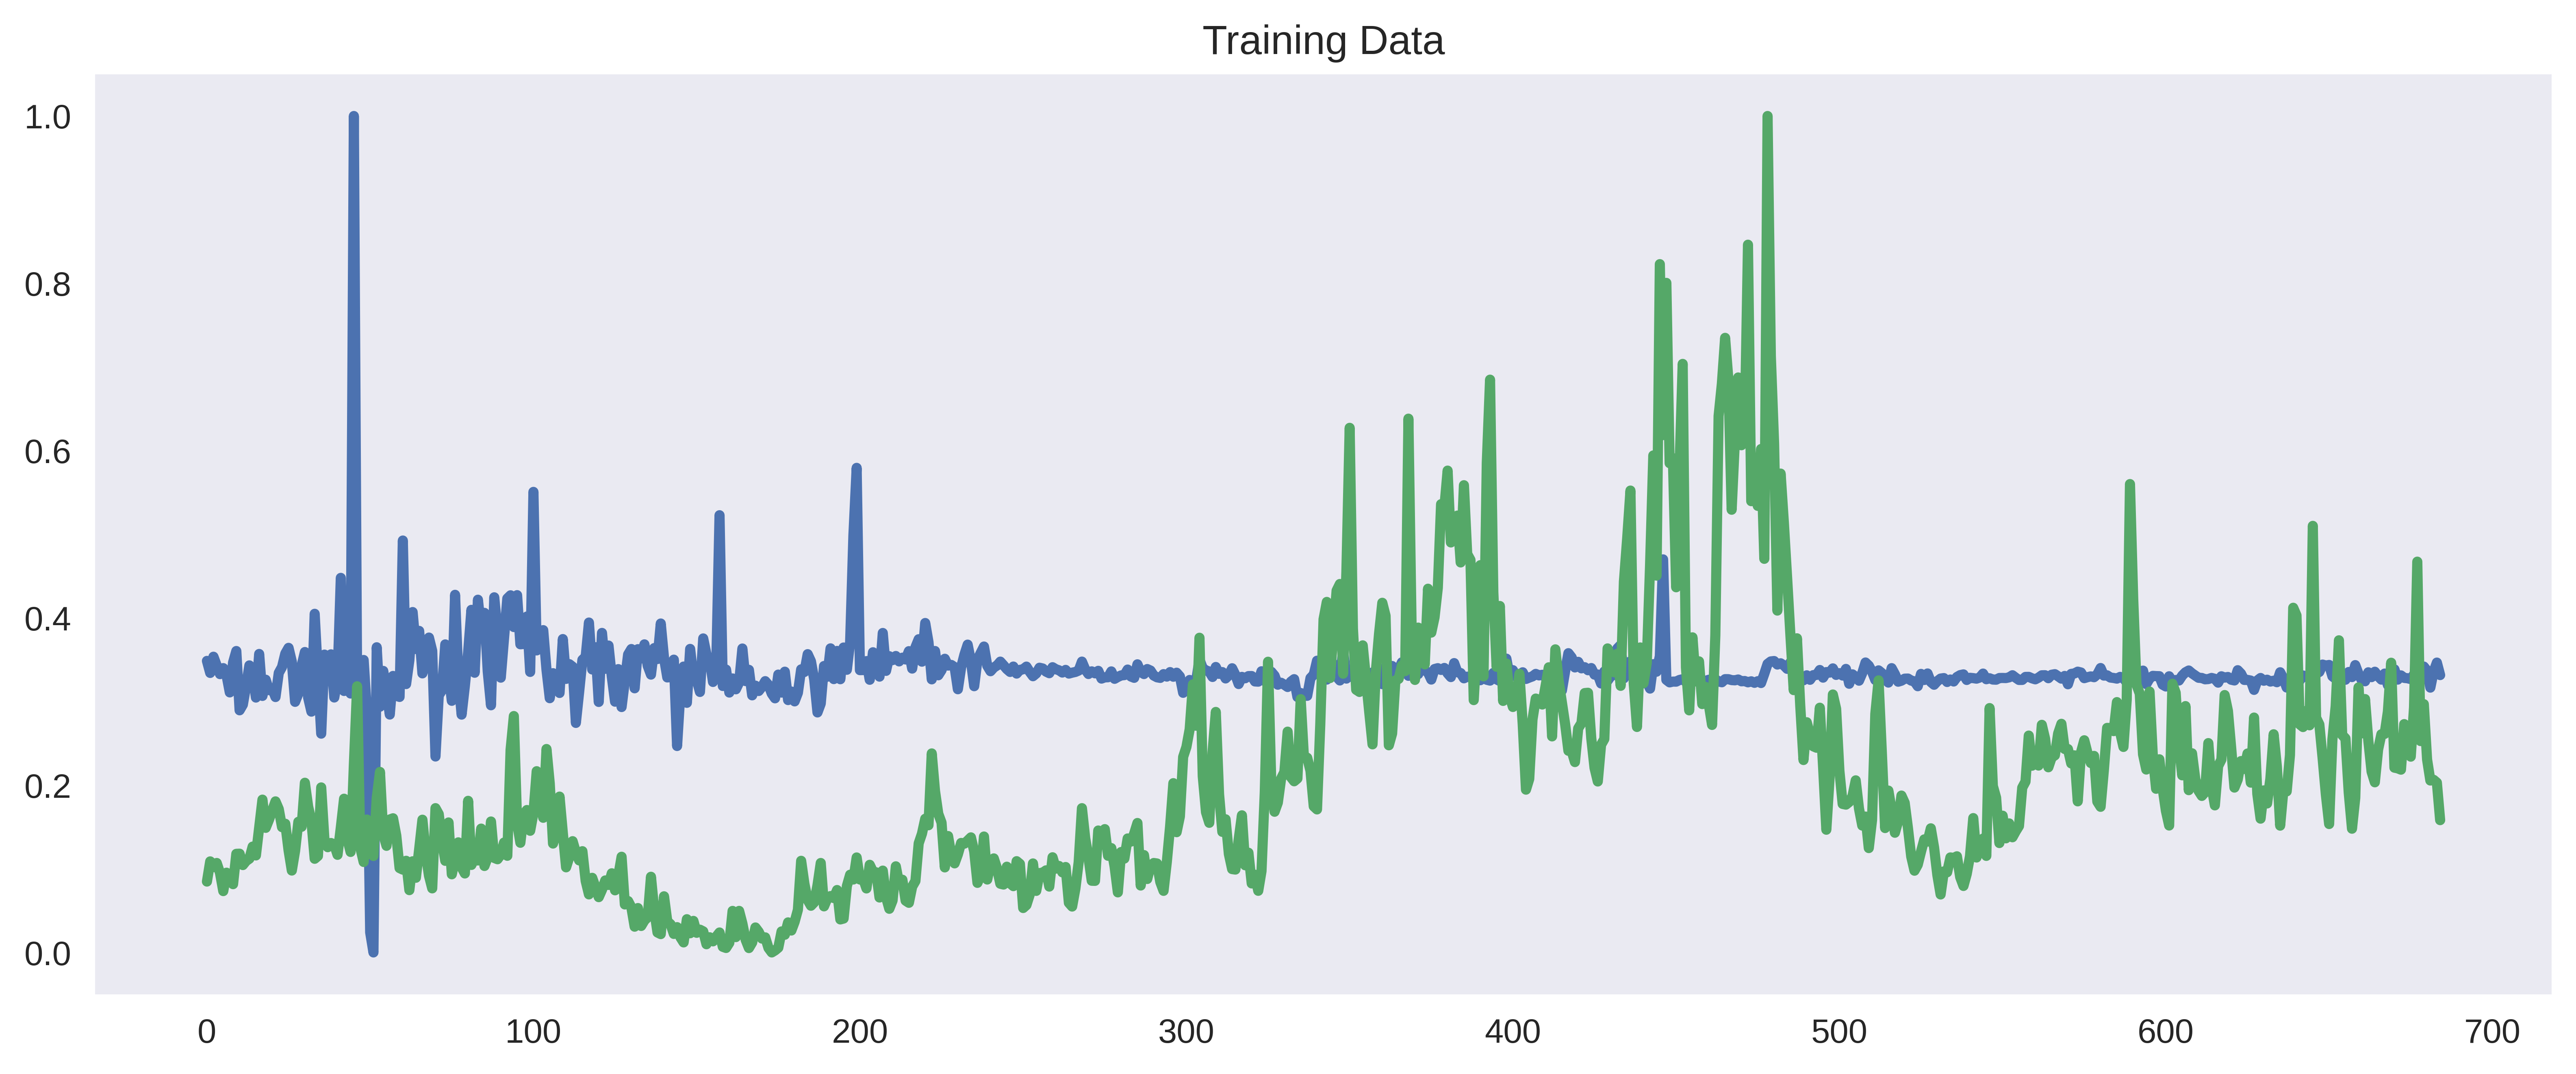

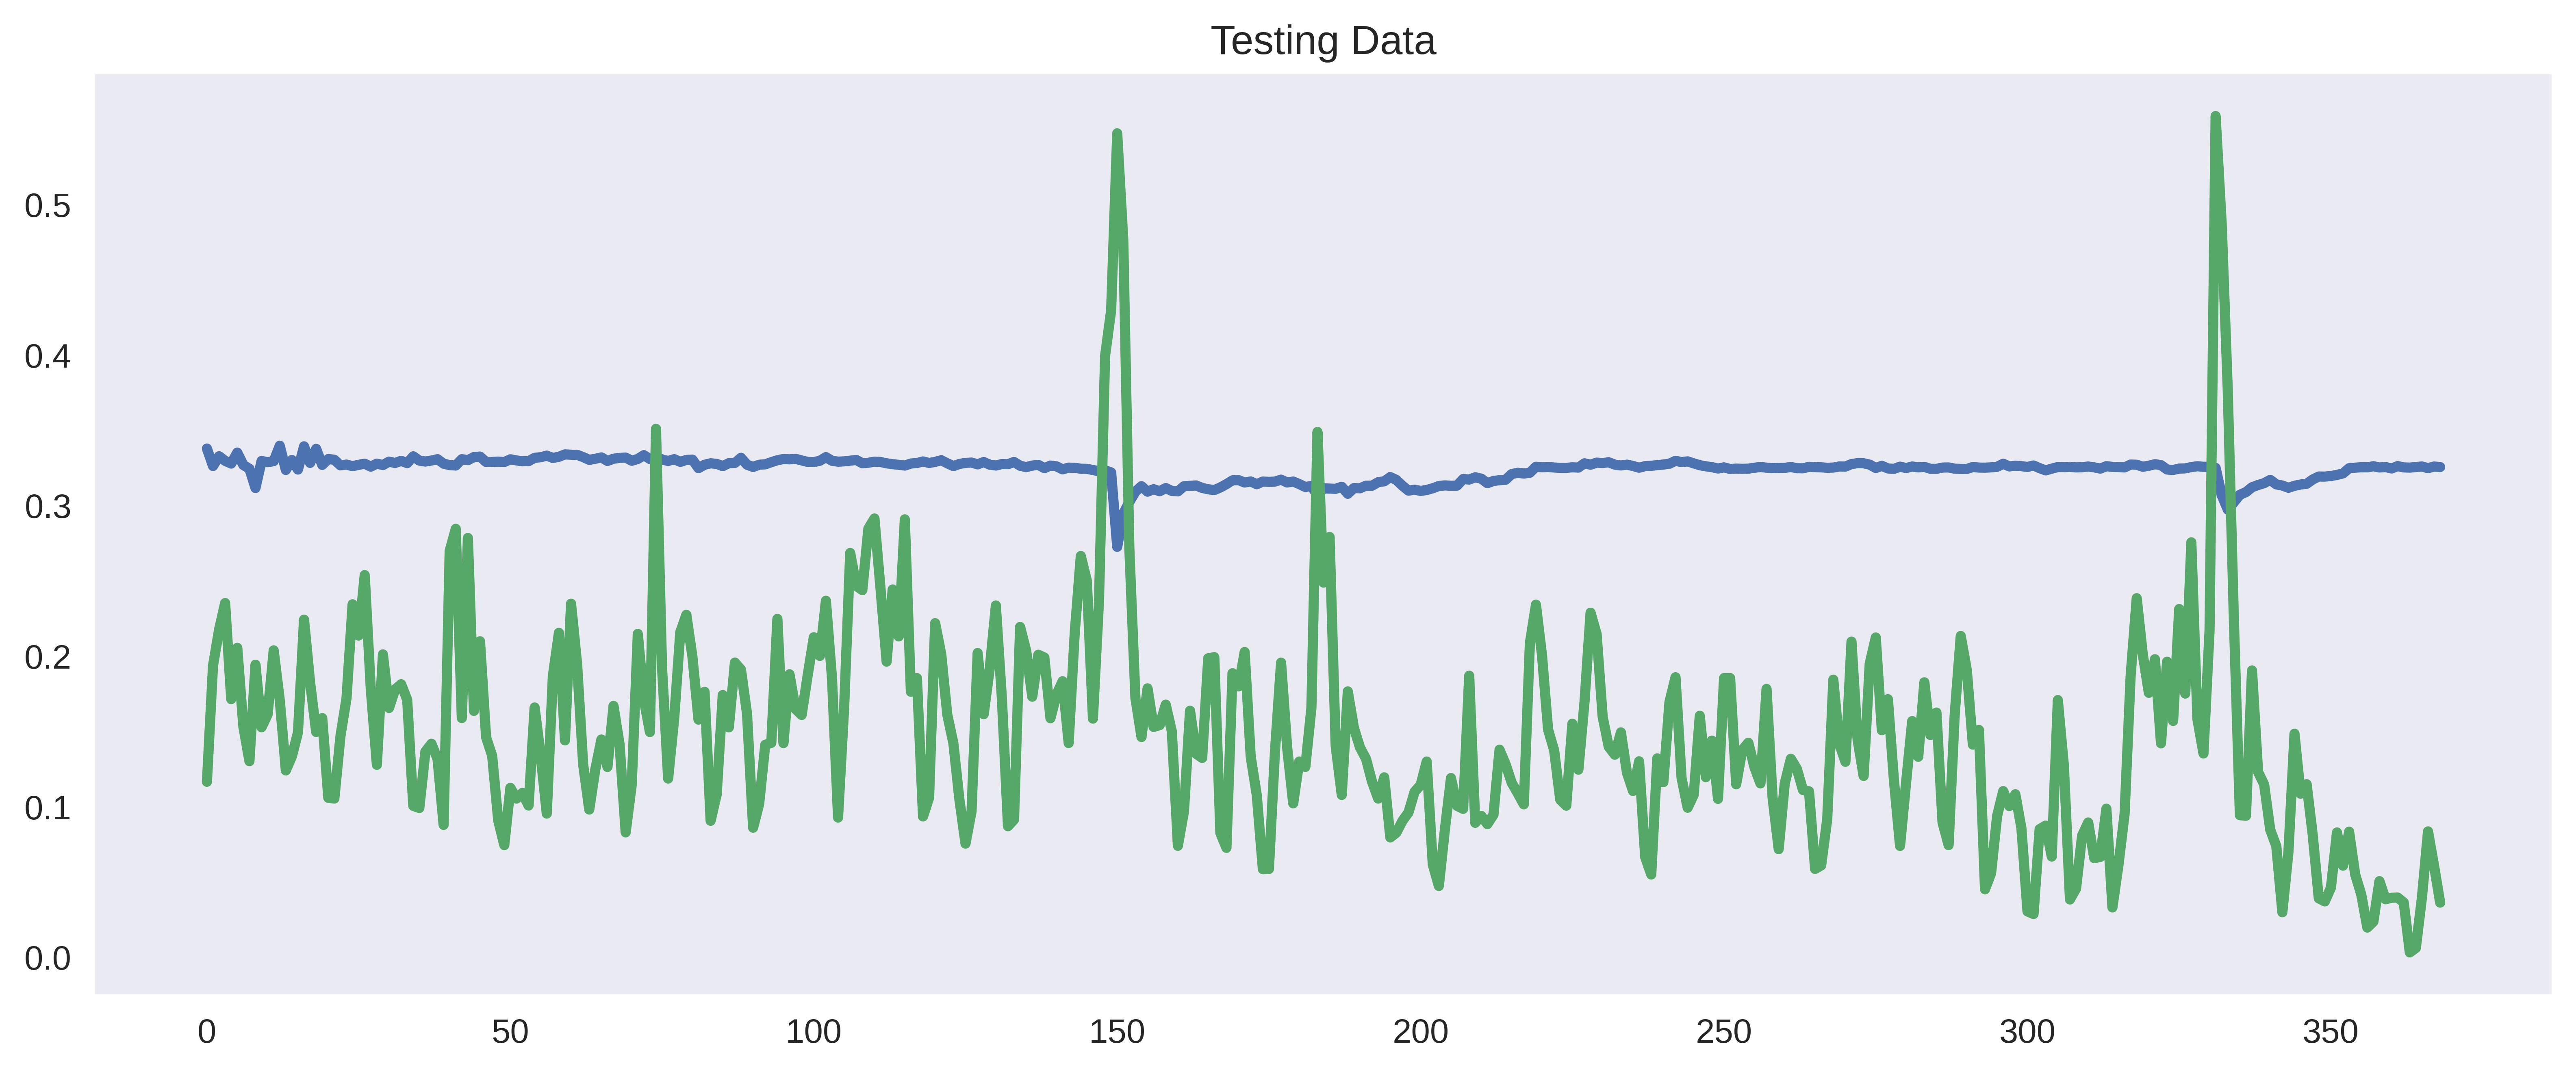

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  -2.262388327529036


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.33841711],
       [0.33682102],
       [0.33868787],
       ...,
       [0.33623456],
       [0.33659006],
       [0.33682921]])

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

1054

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
1049,2022-12-11
1050,2022-12-12
1051,2022-12-13
1052,2022-12-14


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.348539
1,2020-01-28,0.334169
2,2020-01-29,0.353530
3,2020-01-30,0.342892
4,2020-01-31,0.332758
...,...,...
1049,2022-12-11,0.325573
1050,2022-12-12,0.325939
1051,2022-12-13,0.324804
1052,2022-12-14,0.325914


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.348539,0.338417
1,2020-01-28,0.334169,0.336821
2,2020-01-29,0.353530,0.338688
3,2020-01-30,0.342892,0.337649
4,2020-01-31,0.332758,0.336843
...,...,...,...
1049,2022-12-11,0.325573,0.337163
1050,2022-12-12,0.325939,0.336826
1051,2022-12-13,0.324804,0.336235
1052,2022-12-14,0.325914,0.336590


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-27,1.001900,37771545362,1.000760
1,2020-01-28,1.000760,44123906993,1.002296
2,2020-01-29,1.002296,42323320108,1.001452
3,2020-01-30,1.001452,43624728074,1.000648
4,2020-01-31,1.000648,40496855325,1.001216
...,...,...,...,...
1050,2022-12-12,1.000107,25872687355,1.000017
1051,2022-12-13,1.000017,37452330494,1.000105
1052,2022-12-14,1.000105,31427740393,1.000078
1053,2022-12-15,1.000078,24979746073,1.000157


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,1.001900,37771545362,1.000760
1,2020-01-28,1.000760,44123906993,1.002296
2,2020-01-29,1.002296,42323320108,1.001452
3,2020-01-30,1.001452,43624728074,1.000648
4,2020-01-31,1.000648,40496855325,1.001216
...,...,...,...,...
1050,2022-12-12,1.000107,25872687355,1.000017
1051,2022-12-13,1.000017,37452330494,1.000105
1052,2022-12-14,1.000105,31427740393,1.000078
1053,2022-12-15,1.000078,24979746073,1.000157


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.00190000e+00, 3.77715454e+10],
       [1.00076000e+00, 4.41239070e+10],
       [1.00229600e+00, 4.23233201e+10],
       ...,
       [1.00010500e+00, 3.14277404e+10],
       [1.00007800e+00, 2.49797461e+10],
       [1.00015700e+00, 3.18979906e+10]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.34853851]),
 array([0.33416943]),
 array([0.35352988]),
 array([0.34289172]),
 array([0.33275773]),
 array([0.33991706]),
 array([0.33144687]),
 array([0.31088899]),
 array([0.34658482]),
 array([0.3603615]),
 array([0.28949922]),
 array([0.29624261]),
 array([0.31871636]),
 array([0.34315641]),
 array([0.33265689]),
 array([0.30471281]),
 array([0.35684485]),
 array([0.3066791]),
 array([0.32602695]),
 array([0.31359895]),
 array([0.31541399]),
 array([0.30535563]),
 array([0.33415682]),
 array([0.34127834]),
 array([0.35728601]),
 array([0.36414283]),
 array([0.3476436]),
 array([0.2995954]),
 array([0.30946469]),
 array([0.34291692]),
 array([0.35915147]),
 array([0.30458676]),
 array([0.28789846]),
 array([0.40485524]),
 array([0.33086706]),
 array([0.26156774]),
 array([0.35606338]),
 array([0.33243001]),
 array([0.35637849]),
 array([0.30480104]),
 array([0.32688405]),
 array([0.44779863]),
 array([0.31259059]),
 array([0.34628231]),
 array([0.30954032]),
 array([1.]),


In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((737, 1, 1), (317, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
19/19 [==============================] - 10s 99ms/step - loss: 0.0735 - val_loss: 0.0090
Epoch 2/20
19/19 [==============================] - 0s 13ms/step - loss: 0.0059 - val_loss: 3.4361e-04
Epoch 3/20
19/19 [==============================] - 0s 13ms/step - loss: 0.0028 - val_loss: 4.0756e-04
Epoch 4/20
19/19 [==============================] - 0s 15ms/step - loss: 0.0020 - val_loss: 4.3698e-05
Epoch 5/20
19/19 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 2.0056e-04
Epoch 6/20
19/19 [==============================] - 0s 13ms/step - loss: 0.0020 - val_loss: 3.4995e-05
Epoch 7/20
19/19 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 3.5509e-05
Epoch 8/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0021 - val_loss: 3.3754e-05
Epoch 9/20
19/19 [==============================] - 0s 13ms/step - loss: 0.0020 - val_loss: 1.5082e-04
Epoch 10/20
19/19 [==============================] - 0s 13ms/step - loss: 0.

In [102]:
# Make prediction
predicted = model.predict(X)

33/33 [==============================] - 1s 4ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.3355748,
 0.33344007,
 0.33631587,
 0.3347361,
 0.3332302,
 0.33429414,
 0.3330354,
 0.32997757,
 0.33528465,
 0.33732986,
 0.32679176,
 0.32779658,
 0.33114225,
 0.33477545,
 0.3332153,
 0.32905805,
 0.33680797,
 0.32935077,
 0.33222955,
 0.3303808,
 0.33065087,
 0.32915384,
 0.33343822,
 0.3344965,
 0.33687347,
 0.33789092,
 0.3354419,
 0.328296,
 0.3297655,
 0.33473986,
 0.33715034,
 0.32903934,
 0.3265533,
 0.34392327,
 0.33294922,
 0.3226257,
 0.33669198,
 0.3331815,
 0.33673877,
 0.32907122,
 0.332357,
 0.35026944,
 0.3302307,
 0.3352397,
 0.32977676,
 0.43024194,
 0.33132035,
 0.3350525,
 0.33573765,
 0.32639354,
 0.2869072,
 0.28328776,
 0.33799374,
 0.32743037,
 0.33379596,
 0.33020073,
 0.32603276,
 0.33290237,
 0.32937896,
 0.32917064,
 0.35685056,
 0.331461,
 0.3356927,
 0.34423286,
 0.33768332,
 0.34089595,
 0.33335954,
 0.3352229,
 0.3397134,
 0.33735234,
 0.31854504,
 0.3294446,
 0.3303733,
 0.33850235,
 0.33350194,
 0.32848185,
 0.34728009,
 0.3326288,
 0.32602155,
 

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-01
...,...
1050,2022-12-12
1051,2022-12-13
1052,2022-12-14
1053,2022-12-15


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-28,0.335575
2,2020-01-29,0.333440
3,2020-01-30,0.336316
4,2020-01-31,0.334736
5,2020-02-01,0.333230
...,...,...
1050,2022-12-12,0.332162
1051,2022-12-13,0.332216
1052,2022-12-14,0.332048
1053,2022-12-15,0.332213


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.335575,0.334169
2,2020-01-29,0.333440,0.353530
3,2020-01-30,0.336316,0.342892
4,2020-01-31,0.334736,0.332758
5,2020-02-01,0.333230,0.339917
...,...,...,...
1050,2022-12-12,0.332162,0.325939
1051,2022-12-13,0.332216,0.324804
1052,2022-12-14,0.332048,0.325914
1053,2022-12-15,0.332213,0.325573


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")